In [307]:
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from collections import Counter
import matplotlib.pyplot as plt

# create discretizer
kbins = KBinsDiscretizer(n_bins=2, strategy='uniform', encode='ordinal')
# read spambase.data into pandas dataframe
df = pd.read_csv('spambase.data',header = None)

df = df[(df[57] == 1)]

print(len(df))
df.head()
#df[(df[0] <= 2.38)]

1813


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [308]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        mean = df[col].mean()
        sd = df[col].std()

        df = df[(df[col] <= mean+(n_std*sd))]

    return df

df[(np.abs(stats.zscore(df)) < 0.1).all(axis=1)]
df = remove_outliers(df, df.columns, 3)
df

Working on column: 0
Working on column: 1
Working on column: 2
Working on column: 3
Working on column: 4
Working on column: 5
Working on column: 6
Working on column: 7
Working on column: 8
Working on column: 9
Working on column: 10
Working on column: 11
Working on column: 12
Working on column: 13
Working on column: 14
Working on column: 15
Working on column: 16
Working on column: 17
Working on column: 18
Working on column: 19
Working on column: 20
Working on column: 21
Working on column: 22
Working on column: 23
Working on column: 24
Working on column: 25
Working on column: 26
Working on column: 27
Working on column: 28
Working on column: 29
Working on column: 30
Working on column: 31
Working on column: 32
Working on column: 33
Working on column: 34
Working on column: 35
Working on column: 36
Working on column: 37
Working on column: 38
Working on column: 39
Working on column: 40
Working on column: 41
Working on column: 42
Working on column: 43
Working on column: 44
Working on column: 4

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,0.00,0.00,0.68,0.0,0.00,0.00,0.00,1.36,0.00,0.00,...,0.000,0.000,0.0,0.238,0.238,0.000,2.232,19,96,1
1808,0.00,0.00,0.00,0.0,0.00,0.23,0.00,0.00,0.00,0.00,...,0.077,0.038,0.0,0.000,0.000,0.038,2.600,42,182,1
1809,0.39,0.00,0.00,0.0,0.00,0.39,0.79,0.00,0.00,0.39,...,0.000,0.064,0.0,0.640,0.192,0.000,2.740,13,74,1
1811,0.00,0.00,0.00,0.0,0.53,0.00,0.53,0.00,0.53,0.00,...,0.000,0.000,0.0,0.082,0.000,0.000,4.391,66,101,1


In [ ]:
def plot_bins(values):
    """visualizes the number of observations in each bin"""

    counter = Counter(values)
    plt.bar(counter.keys(), counter.values())
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.show()

def show_bins(bins):
    """Shows the ranges of values the bins comprises"""

    for i in range(len(bins)-1):
        print(f'Bin {i}: {str(bins[i])} -> {str(bins[i+1])}')

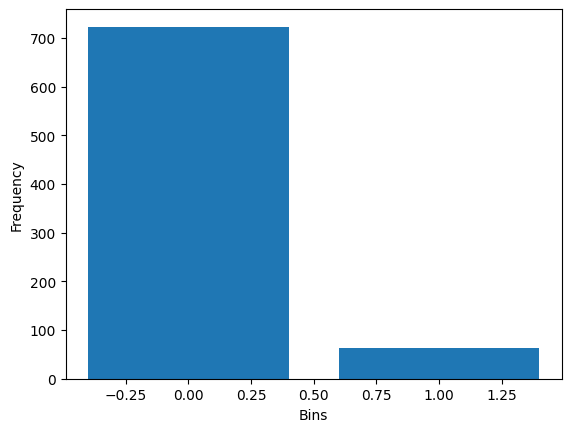

Bin 0: 0.0 -> 0.53
Bin 1: 0.53 -> 1.06


In [309]:
#bins = [2, 2, 2, 2]
att = df.iloc[:, 0:1]
att_bin = kbins.fit_transform(np.array(att).reshape(-1,1))
# show results
plot_bins(Counter(list(att_bin.flatten())))
show_bins(kbins.bin_edges_[0])

In [310]:
# Equal-Width Discretization
frames = []
for i in range(0,57):
    bin = kbins.fit_transform(np.array(df.iloc[:, i:i + 1]).reshape(-1,1))
    frames.append(pd.DataFrame(bin, columns=[str(i)]))

data = pd.concat(frames, axis=1)
data
#att1 = df.iloc[:, 0:1]
#att2 = df.iloc[:, 1:2]
#att_bin = kbins.fit_transform(np.array(att).reshape(-1,1))
# att_bin48 = kbins.fit_transform(np.array(att48).reshape(-1,48))
# att_bin54 = kbins.fit_transform(np.array(att54).reshape(-1,6))
# att_bin55 = kbins.fit_transform(np.array(att55).reshape(-1,1))
# att_bin56 = kbins.fit_transform(np.array(att56).reshape(-1,1))
# att_bin57 = kbins.fit_transform(np.array(att57).reshape(-1,1))
#print(len(att_bin))

#att_bin_df = pd.DataFrame(att_bin)
# att_bin_df48 = pd.DataFrame(att_bin48)
# att_bin_df54 = pd.DataFrame(att_bin54)
# att_bin_df55 = pd.DataFrame(att_bin55)
# att_bin_df56 = pd.DataFrame(att_bin56)
# att_bin_df57 = pd.DataFrame(att_bin57)
#att_bin_df.head(100)
# show results
#plot_bins(Counter(list(att_bin.flatten())))
#show_bins(kbins.bin_edges_[0])
# frames = [att_bin_df48, att_bin_df54, att_bin_df55, att_bin_df56, att_bin_df57]

#data = pd.concat(frames, axis=1)
#data.head(100)


/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:257: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:257: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:257: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:257: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:257: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [311]:
#df[(df[1] <= 7.14)]
for k in range(0,57):
    print(str(k) + " " + str(len(data[(data[str(k)] == 1)])))

0 64
1 50
2 65
3 4
4 99
5 74
6 62
7 52
8 48
9 49
10 67
11 97
12 57
13 13
14 12
15 41
16 75
17 70
18 182
19 37
20 152
21 7
22 67
23 39
24 2
25 5
26 0
27 2
28 2
29 1
30 0
31 0
32 5
33 2
34 2
35 25
36 11
37 6
38 4
39 22
40 0
41 1
42 25
43 4
44 52
45 1
46 1
47 0
48 10
49 30
50 16
51 53
52 27
53 10
54 6
55 28
56 35


In [312]:
def LGG(firstrow,row):
    index = 0
    for x,y in zip(list(firstrow),list(row)):
        if x !=y:
            firstrow[index]=-1
        index = index+1
    return firstrow

def LGGSET(data):
   firstrow=data.iloc[0:1,:]
   for index, row in data.iterrows():
       if index==0:
           firstrow=row
       else:
            firstrow = LGG(firstrow,row)

   return firstrow

print(LGGSET(data))


0    -1.0
1    -1.0
2    -1.0
3    -1.0
4    -1.0
5    -1.0
6    -1.0
7    -1.0
8    -1.0
9    -1.0
10   -1.0
11   -1.0
12   -1.0
13   -1.0
14   -1.0
15   -1.0
16   -1.0
17   -1.0
18   -1.0
19   -1.0
20   -1.0
21   -1.0
22   -1.0
23   -1.0
24   -1.0
25   -1.0
26    0.0
27   -1.0
28   -1.0
29   -1.0
30    0.0
31    0.0
32   -1.0
33   -1.0
34   -1.0
35   -1.0
36   -1.0
37   -1.0
38   -1.0
39   -1.0
40    0.0
41   -1.0
42   -1.0
43   -1.0
44   -1.0
45   -1.0
46   -1.0
47    0.0
48   -1.0
49   -1.0
50   -1.0
51   -1.0
52   -1.0
53   -1.0
54   -1.0
55   -1.0
56   -1.0
Name: 0, dtype: float64
